# INTRODUCTION

The notebook contains 5 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)
* [Exercise 5](#ex_5)

**Regression** is one of the main types of supervised learning in machine learning. In regression, the training set contains observations (also called features) and their associated continuous target values. The process of regression has two phases:
- The first phase is exploring the relationships between the observations and
the targets. This is the training phase.
- The second phase is using the patterns from the first phase to generate the
target for a future observation. This is the prediction phase.

The major difference between regression and classification is that the output values in regression are continuous, while in classification they are discrete. This leads to different application areas for these two supervised learning methods. Classification is basically used to determine desired memberships or characteristics.On the other hand, regression mainly involves estimating an outcome or forecasting a response.

The process of regression is explained in the following figure:

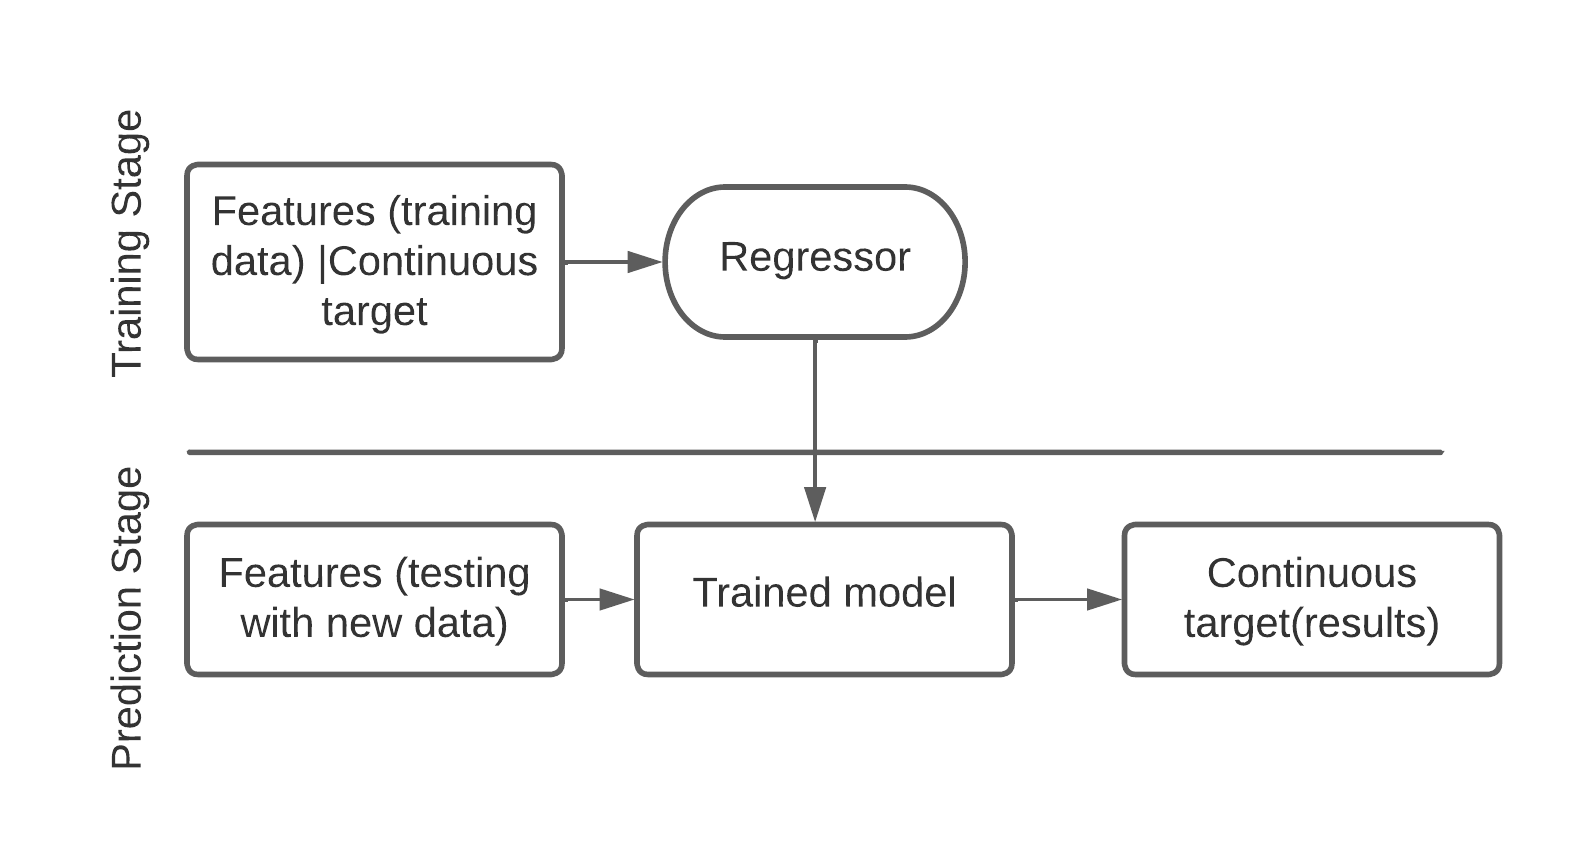

# Predict Stock Prices using Linear Regression

## Problem description

The stock of a corporation signifies ownership in the corporation. A single share of the stock represents a claim on the fractional assets and the earnings of the corporation in proportion to the total number of shares. For example, if an investor owns 50 shares of stock in a company that has, in total, 1,000 shares,then that investor (or shareholder, etc) would own and have a claim on 5% of the company's assets and earnings.

Stocks of a company can be traded between shareholders and other parties via stock exchanges and organizations. Major stock exchanges include New York Stock Exchange, NASDAQ, London Stock Exchange Group, Shanghai Stock Exchange, and Hong Kong Stock Exchange. The prices that a stock is traded at fluctuate essentially due to the law of supply and demand. At any one moment, the supply is the number of shares that are in the hands of public investors, the demand is the number of shares investors want to buy, and the price of the stock moves up and down in order to attain and maintain equilibrium.

Investors generally want to buy low and sell high. This seems straightforward enough, but putting it into practice is exceedingly tough because it is incredibly difficult to predict whether a stock price will increase or decrease. Fundamental analysis and technical analysis are the two main research areas that aim to comprehend the reasons and circumstances that influence price fluctuations or even forecast future stock prices:
- Fundamental analysis: This stream focuses on the fundamental elements that affect a company's value and operations, such as the macroeconomic environment, the state of the industry, and the company's management and competitors.

- Technical analysis, on the other hand, uses statistical analysis of historical trading activity, such as price movement, volume, and time, to forecast future price movements.

In the following discussoion, we are going to explore the second technique using Apple dataset so to predict the stock and help investors decide whether to buy or not.

## Dataset description

This dataset contains Apple's (AAPL) stock data for the last 10 years (from 2010).Insights from this data can be used to build useful price forecasting algorithms to aid investment. Data is collected and aggregated from 25 exchanges.

In order to better illustrate this regression approach it is necessary to have suitable predictors for our target. Lets understand features and determine target.

The dataset recorded more direct elements to the stock. Five values illustrating movements in the price over one unit of time (usually one day, but it can also be one week or one month) are key trading indicators. They are as follows:

- **Open**: Stock price at the opening of the trading day

- **Close**: Stock price at the closing of the trading day

- **High**: Maximum stock price during the trading day

- **Low**: Minimum stock price during the trading day

- **Volume**: The total number of shares traded before the market closed on that day

We will be focusing on historical prices (the 5 recorded values) and performance to predict future prices.

**Note**: You can find the dataset available in the zip folder you have downloaded.



# 1. Import libraries

We use a number of Python packages.

- **Numpy**: NumPy works with Python objects called multi-dimensional arrays. Arrays are basically collections of values, and they have one or more dimensions. NumPy array data structure is also called ndarray, short for n-dimensional array. An array with one dimension is called a vector and an array with two dimensions is called a matrix. Datasets are usually built as matrices and it is much easier to open those with NumPy instead of working with list of lists, for example.

- **Pandas**: Just like numpy, pandas is the second vanilla library for any python program. Pandas is mainly used for data analysis and associated manipulation of tabular data in DataFrames. Pandas allows importing data from various file formats such as comma-separated values, JSON, Parquet, SQL database tables or queries, and Microsoft Excel.

- **Matplotlib**: it is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

- **Sklearn**: this package included almost every statisctical analytical task you will ever do in python either you are working on a ML (DL) project or any other project.
- **Seaborn**: it is predominantly used for making statistical graphics. Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python. Visualization is the central part of Seaborn which helps in exploration and understanding of data.

- **os (Miscellaneous operating system interfaces)**: This module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module. For creating temporary files and directories see the tempfile module, and for high-level file and directory handling see the shutil module.

- **pylab**: PyLab is a convenience module that bulk imports matplotlib. pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 2. Load the dataset

You can find the dataset available in the zip folder you have downloaded. 

In [ ]:
#Files is one of the modules prebuild in GC that includes many functions to help you work with files in GC
from google.colab import files
uploaded = files.upload()

Saving regression-dataset-historical-quotes.csv to regression-dataset-historical-quotes (1).csv


In [ ]:
#Reading the dataset using "read_csv" a prebuild function in the "pandas" package, the "index_col" contains the column to use as the row labels of the DataFrame
Stock = pd.read_csv('regression-dataset-historical-quotes.csv',  index_col=0)
df_Stock = Stock
#"rename" prebuild function that enables us to change the name of a column in a Dataframe
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
#Display using Head function that returns the dataframe or series with the first few rows (by default 5)
df_Stock.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
02/27/2020,$273.52,80151380,$281.1,$286,$272.96
02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


# 3. Explore dataset



## Getting the data's types and convert into float

In [ ]:
#Printing information about the DataFrame
df_Stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 02/28/2020 to 03/01/2010
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Close/Last  2518 non-null   object
 1    Volume      2518 non-null   int64 
 2    Open        2518 non-null   object
 3    High        2518 non-null   object
 4    Low         2518 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


<a name="ex_1"></a>
## Exercise 1

In [ ]:
# Use the describe() function from Pandas which is for calculating some statistical data like percentile, mean and std. so on.
# Display a decription of the dataset

print(df_Stock.describe())

             Volume
count  2.518000e+03
mean   7.258009e+07
std    5.663113e+07
min    1.136205e+07
25%    3.053026e+07
50%    5.295469e+07
75%    9.861006e+07
max    4.624423e+08


In [ ]:
#Converting columns that contain data type (Dtype) =object to float using the "astype" prebuild function 
#In the same time replacing "$" symbol with an empty space 
df_Stock["Close"] = df_Stock[' Close/Last'].str.replace('$','').astype(float)
df_Stock['Open'] = df_Stock[' Open'].str.replace('$','').astype(float)
df_Stock['High'] = df_Stock[' High'].str.replace('$','').astype(float)
df_Stock['Low'] = df_Stock[' Low'].str.replace('$','').astype(float)

df_Stock['Volume'] = df_Stock[' Volume']
#With the new named columns containing the converted datatypes, we are droping pevious columns
drop = [' Close/Last',' Open',' High',' Low',' Volume']
df_Stock = df_Stock.drop(drop,axis=1)
#Diplaying the new dataset 
df_Stock.head()

,Close,Open,High,Low,Volume
Date,,,,,
02/28/2020,273.36,257.26,278.41,256.37,106721200
02/27/2020,273.52,281.10,286.00,272.96,80151380
02/26/2020,292.65,286.53,297.88,286.50,49678430
02/25/2020,288.08,300.95,302.53,286.13,57668360
02/24/2020,298.18,297.26,304.18,289.23,55548830


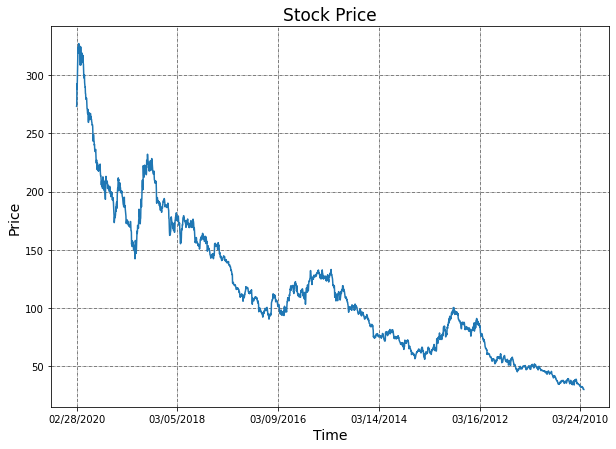

In [ ]:
#Using matplotlib we are constructing the figure to display stock price as a function of time
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show();

# 4. Split dataset

We are using a Train-Valid-Test split tehnique:

- **Train Dataset**: Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model

- **Valid Dataset**: Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters. Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection.

- **Test Dataset**: Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset.

In [ ]:
def create_train_test_set(df_Stock):

    """
    'Close' column represents the predicted value of close prices in the 
    previous 10 years. so not to make our model overfit and the learning to be biased by these values 
    we drop this column.
    """
    features = df_Stock.drop(columns=['Close'], axis=1)

    #now the target is to predit the values of the close column which represents the predicted 
    #prices by which shares of apple corporation will be sold (or bought).
    target = df_Stock['Close']
    
    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.5)
    print('Training Set length', str(train_split))

    val_split = train_split + int(data_len * 0.4)
    print('Validation Set length', str(int(data_len * 0.2)))

    print('Test Set length', str(int(data_len * 0.1)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

<a name="ex_2"></a>
## Exercise 2

In [ ]:
# Try using different splitting ratios and compare results of models in the end

#code rewritten above

In [ ]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is 2518
Training Set length 1259
Validation Set length 503
Test Set length 251
(1259, 4) (1007, 4) (252, 4)
(1259,) (1007,) (252,)


# 5. Build and train the regression model

In this section, we are using Linear Regression to build a model.

Linear regression explores the relationship between observations and targets, this relationship is represented in a linear equation or weighted sum function.

Taking into account our features {Low, High, Volume, Close, Open ...} and weights (that will be calulated later and represents the importance of features to achieve target), then the {close_forecast} can be calulated as follow:

- close_forecast = weight1feature1 + weight2feature2 + weight3feature3 +....+ weight(n)feature(n)

Here also comes an other important parameter called **bias**. The bias represent takes into account any pertubations. Hence the previous equation become:

- close_forecast = weight1feature1 + weight2feature2 + weight3feature3 +....+weight(n)feature(n) + bias

In [ ]:
from sklearn.linear_model import LinearRegression #uploading the linear regression model 

lr = LinearRegression()
#fit() is implemented by every estimator and it accepts an input for the sample data ( X_train ) and for supervised models it also accepts an argument for labels (Y_train)
lr.fit(X_train, Y_train)

LinearRegression()

coef_array of shape (n_features, ) or (n_targets, n_features):

returns the estimated coefficients for the linear regression problem. in our case only one target is passed (close_forecast), this is a 1D array of length n_features.

In [ ]:
#Displaying the models coefficients and intercept 
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-5.77033111e-01  7.93385839e-01  7.83744277e-01 -3.03459258e-09]
LR Intercept: 
 0.12144150955973032


<a name="ex_3"></a>
##Exercise 3

In [ ]:
# The actual dataset is a time series dataset conatining multiple variable. 
# Define a function to describe the feature importance


#feature importance: refers to techniques that calculate a score for all the input features for a given model.
#The scores simply represent the “importance” of each feature. 
#A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable


def describe_feature_importance(df_Stock):
  print(train_split.describe())
  print(val_split.describe())

In [ ]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9996974547302939


In [ ]:
#Calculating the regression error in order to be used while evaluating the model's performance
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#In this case we are using linear regression 

Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

# 6. Model Evaluation

Metrics used to measure the performance of a regression model aren't the same the metrics used to measure the perfomance of a classification model.

Some of the important metrics used to assess a regression model are listed below.

### Mean Absolute Error(MAE)

MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

To better understand, let’s take an example you have input data and output data and use Linear Regression, which draws a best-fit line.

Now you have to find the MAE of your model which is basically a mistake made by the model known as an error. Now find the difference between the actual value and predicted value that is an absolute error but we have to find the mean absolute of the complete dataset.

so, sum all the errors and divide them by a total number of observations And this is MAE. And we aim to get a minimum MAE because this is a loss.



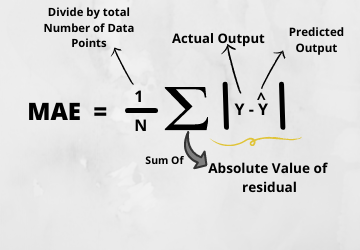


## Mean Squared Error(MSE):


MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

So, above we are finding the absolute difference and here we are finding the squared difference.

What actually the MSE represents? It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

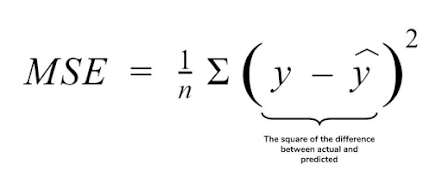

## Root Mean Squared Error(RMSE): 

As RMSE is clear by the name itself, that it is a simple square root of mean squared error.

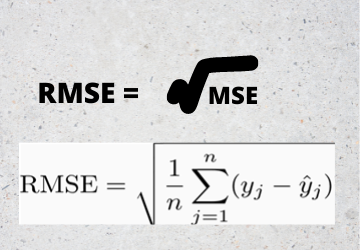




## Root Mean Squared Log Error(RMSLE): 

Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

## R Squared (R2)

R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context. 


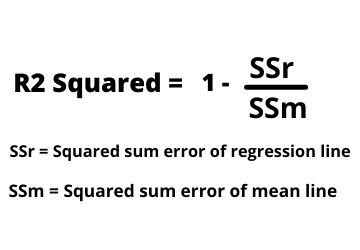





## Adjusted R Squared



The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect.

Hence, To control this situation Adjusted R Squared came into existence.


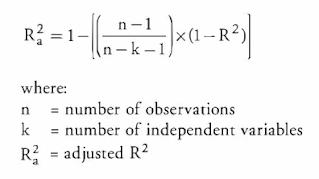

In [ ]:
#Using different metrics (prebuild function of sklearn) to evaluate the model's performance
print("let's get metrics for training ...........\n\n")

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print("\n\nNow it is time for validation ...........\n\n")

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))


print("\n\nlet's go directly and dicover how our model did for the testing dataset ...\n\n")


print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))


let's get metrics for training ...........


Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.39
Training Mean Squared Error: 0.8
Training RMSE:  0.9
Training MAE:  0.63


Now it is time for validation ...........


Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.49
Validation Mean Squared Error: 0.8
Validation RMSE:  0.51
Validation MAE:  0.37


let's go directly and dicover how our model did for the testing dataset ...


Test R-squared:  0.99
Test Explained Variation:  0.99
Test MAPE: 1.0
Test Mean Squared Error: 0.34
Test RMSE:  0.58
Test MAE:  0.39


<a name="ex_4"></a>
## Exercise 4

In [ ]:
# We mentioned many regression metrics earlier and we have actually used many as above.

# Use metrics from sklearn and based on the previously used metrics
# Calculate and print "mean poisson deviance" and "maximum error" values of the training, validation and testing of the model 

print("training: mean poisson deviance", metrics.mean_poisson_deviance(Y_train, Y_train_pred))
print("training: maximum error", metrics.max_error(Y_train, Y_train_pred))

print("validation: mean poisson deviance", metrics.mean_poisson_deviance(Y_val, Y_val_pred))
print("validation: maximum error", metrics.max_error(Y_val, Y_val_pred))

print("testing: mean poisson deviance", metrics.mean_poisson_deviance(Y_test, Y_test_pred))
print("testing: maximum error", metrics.max_error(Y_test, Y_test_pred))

training: mean poisson deviance 0.0045234312098228705
training: maximum error 7.770683125113237
validation: mean poisson deviance 0.0033390636874588743
validation: maximum error 2.8183321276967064
testing: mean poisson deviance 0.009448215244883982
testing: maximum error 5.372039543210903


In [ ]:
#Displaying the values of actual price at a closing trading day and the predicted value of the price 
df_pred = pd.DataFrame(Y_val.values, columns=['close Actual'], index=Y_val.index)
df_pred['Close Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred

,Date,close Actual,Close Predicted
0,02/27/2015,128.4600,129.018956
1,02/26/2015,130.4150,128.591831
2,02/25/2015,128.7900,128.827127
3,02/24/2015,132.1700,132.001026
4,02/23/2015,133.0000,132.014400
...,...,...,...
1002,03/04/2011,51.4286,50.986752
1003,03/03/2011,51.3657,50.927820
1004,03/02/2011,50.3028,49.986986
1005,03/01/2011,49.9014,49.719508


<a name="ex_5"></a>
## Exercise 5

Date
02/28/2020    273.3600
02/27/2020    273.5200
02/26/2020    292.6500
02/25/2020    288.0800
02/24/2020    298.1800
                ...   
03/05/2010     31.2786
03/04/2010     30.1014
03/03/2010     29.9043
03/02/2010     29.8357
03/01/2010     29.8557
Name: Close, Length: 2518, dtype: float64


ValueError: ignored

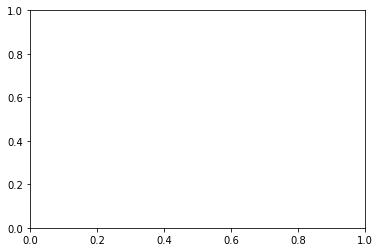

In [ ]:
# Use matplotlib.pyplot plot in the same figure the "close actual" and "close predicted" 
# Date being the axis and "close actual" and "close predicted" as Y labels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dates = df_Stock.iloc[:,0]
print(dates)

fig,ax=plt.subplots()
ax.plot(Y_val_pred, dates, marker="o")
ax.plot(Y_val, dates, marker="o")
ax.set_xlabel("Date")
ax.set_ylabel("Close actual and close predicted")
plt.show()

# References

[1] https://github.com/PacktPublishing/Python-Machine-Learning-By-Example-Third-Edition


[2] https://github.com/s-shemmee/Python-in-30-Days/tree/main/Python-Projects


[3] https://github.com/hydroffice/python_basics


[4] https://learnbyexample.github.io/100_page_python_intro/



[5] https://github.com/joaoventura/full-speed-python/tree/master/chapters 



[6] https://jakevdp.github.io/PythonDataScienceHandbook/




[7] https://automatetheboringstuff.com/ 



[8] https://github.com/Akuli/python-tutorial/tree/master/basics



[9] https://github.com/Akuli/python-tutorial/tree/master/advanced 



[10] https://github.com/PythonFreeCourse/Notebooks



[11] https://github.com/milaan9/07_Python_Advanced_Topics



[12] https://github.com/fchollet/deep-learning-with-python-notebooks 


[13] https://github.com/tirthajyoti/Deep-learning-with-Python/tree/master/Notebooks



[14] https://github.com/LearnPythonWithRune/MachineLearningWithPython 



[15] https://github.com/ss-python-projects/student-grade-predictor 



[16] https://github.com/bamtercelboo/cnn-lstm-bilstm-deepcnn-clstm-in-pytorch 



[17] https://github.com/emirhanai/Cryptocurrency-Prediction-with-Artificial-Intelligence




[18]: https://github.com/jinglescode/time-series-forecasting-pytorch